In [49]:
import numpy as np
import pandas as pd
from numpy import array as arr
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sympy import latex
from sympy import Matrix
import scipy as sc
import matplotlib.colors as mcolors

In [50]:
def matrix_beauty(A, ord = 2):
    a = latex(Matrix(np.around(A, decimals=ord)))
    a = a.replace("\\left[\\begin{matrix}", "\\begin{pmatrix}\n\t")
    a = a.replace("\\end{matrix}\\right]", "\n\\end{pmatrix}")
    a = a.replace("\\\\", "\\\\ \n\t")
    return a

## Задание 1

In [51]:
A = arr([[-3, 2],
          [6, -8]])

In [52]:
def find_inv(m):
    m_ = arr([[m[1,1], m[0,1]],[m[1,0], m[0,0]]])
    m_ = m_/np.linalg.det(m)
    return m_

In [53]:
A_ = find_inv(A)
nA_ = norm(A_, ord=1)
dA = np.ones((2, 2))* 0.01
ndA = norm(dA, ord=1)

In [54]:
print(matrix_beauty(A_))

\begin{pmatrix}
	-0.67 & 0.17\\ 
	0.5 & -0.25
\end{pmatrix}


In [55]:
nY = nA_*ndA
print(f"{nY/(1-nY):.2f}")

0.02


In [56]:
del A, A_, nY, nA_, dA, ndA

## Задание 2

In [57]:
rA = arr([[-4.97, -0.14],
           [-0.06, -0.96]])
rb = arr([[-5.18],[-1.08]])
b = np.around(rb, decimals=0)
db = rb - b
A = np.around(rA, decimals=0)
dA = rA - A
A_ = find_inv(A)
rA_ = find_inv(rA)

In [58]:
print("A =",matrix_beauty(A))
print("dA =",matrix_beauty(dA))
print("b =",matrix_beauty(b))
print("db =",matrix_beauty(db))
print("A_ =",matrix_beauty(A_))


A = \begin{pmatrix}
	-5.0 & 0\\ 
	0 & -1.0
\end{pmatrix}
dA = \begin{pmatrix}
	0.03 & -0.14\\ 
	-0.06 & 0.04
\end{pmatrix}
b = \begin{pmatrix}
	-5.0\\ 
	-1.0
\end{pmatrix}
db = \begin{pmatrix}
	-0.18\\ 
	-0.08
\end{pmatrix}
A_ = \begin{pmatrix}
	-0.2 & 0\\ 
	0 & -1.0
\end{pmatrix}


In [59]:
kappa = lambda m, m_, ord = 2: norm(m, ord = ord) * norm(m_, ord = ord)
delta = lambda b, db, ord = 2: norm(b, ord = ord) / norm(db, ord = ord)
kap_1 = kappa(A, A_, ord=1)
kap_2 = kappa(A, A_)
delta1_b = delta(b, db, ord = 1)
delta2_b = delta(b, db)

In [60]:
print(f"kap_1 = {kap_1:.2f}")
print(f"kap_2 = {kap_2:.2f}")
print(f"delta1_b = {delta1_b:.2f}")
print(f"delta2_b = {delta2_b:.2f}")

kap_1 = 5.00
kap_2 = 5.00
delta1_b = 23.08
delta2_b = 25.89


In [61]:
delta1_x_u = kap_1 * delta1_b
delta2_x_u = kap_2 * delta2_b
delta1_x_d = delta1_b / kap_1
delta2_x_d = delta2_b / kap_2

In [62]:
print(f"delta1_x_u = {delta1_x_u:.2f}")
print(f"delta1_x_u = {delta1_x_u:.2f}")
print(f"delta2_x_d = {delta2_x_d:.2f}")
print(f"delta2_x_d = {delta2_x_d:.2f}")

delta1_x_u = 115.38
delta1_x_u = 115.38
delta2_x_d = 5.18
delta2_x_d = 5.18


In [63]:
rx = rA_@rb
x = A_@b
dx = rA_@rb - A_@b

In [64]:
print(f"real sol = {matrix_beauty(rx)}")
print(f"x = {matrix_beauty(x)}")
print(f"dx = {matrix_beauty(dx)}")

real sol = \begin{pmatrix}
	1.08\\ 
	1.19
\end{pmatrix}
x = \begin{pmatrix}
	1.0\\ 
	1.0
\end{pmatrix}
dx = \begin{pmatrix}
	0.08\\ 
	0.19
\end{pmatrix}


In [65]:
print(f"delta1_x = {delta(x, dx, ord=1):.2f}")
print(f"delta2_x = {delta(x, dx, ord=2):.2f}")

delta1_x = 7.46
delta2_x = 6.84


In [66]:
del A, b, dA, db, rA, rb, A_, kap_1, kap_2
del delta1_x_u, delta2_x_u, delta1_x_d, delta2_x_d, rA_
del x, dx, rx, delta1_b, delta2_b

## Задание 3

## Задание 4

In [67]:
A = arr([[23, 8, 1],
         [3, 19, 5],
         [9, 7, 23]])
G = np.diag(1/np.diag(A))
b = arr([9, 4, 5])
P = -1 * G @ (A - np.diag(np.diag(A)))
b = G @ b

In [68]:
def it_met(P, b, a = 0, tol = 0.01):
    xn = arr([0] * len(P)) + a
    xl = arr([0] * len(P)) + a
    s = 0
    while (norm(xl - xn, ord=1) > tol) or (s == 0) and (s < 1000):
        s += 1
        xl, xn = xn, P@xn + b
    return s, xn


In [69]:
s, x = it_met(P, b)
print(f"step = {s}")
print(f"x = {matrix_beauty(x)}")

step = 8
x = \begin{pmatrix}
	0.34\\ 
	0.15\\ 
	0.04
\end{pmatrix}


In [70]:
print(matrix_beauty(A@x))

\begin{pmatrix}
	8.99\\ 
	3.99\\ 
	4.98
\end{pmatrix}


In [71]:
del A, b, G, P, s, x

## Задание 5

In [72]:
class symb:
    def __init__(self, name, koef=None):
        self.name = name
        if koef is None:
            self.koef = np.array([0, 1], dtype=float)
        else:
            self.koef = koef

    def __add__(self, a):
        if isinstance(a, symb):
            if self.name == a.name:
                g = np.zeros(np.max((len(self.koef), len(a.koef))))
                for ni, i in enumerate(self.koef):
                    g[ni] += i
                for ni, i in enumerate(a.koef):
                    g[ni] += i
                return symb(self.name, g)
        else:
            self.koef[0] += a
        return self

    def __radd__(self, a):
        return self.__add__(a)

    def __mul__(self, a):
        if isinstance(a, symb):
            m = np.zeros(1 + len(self.koef) + len(a.koef) - 2)
            for ni, i in enumerate(self.koef):
                for nj, j in enumerate(a.koef):
                    m[ni + nj] += i * j
            return symb(self.name, m)
        elif isinstance(a, (int, float)):
            m = np.zeros(len(self.koef))
            for ni, i in enumerate(self.koef):
                m[ni] = i * a
            return symb(self.name, m)
        else:
            raise TypeError("Unsupported operand type for multiplication")

    def __rmul__(self, a):
        return self.__mul__(a)

    def __truediv__(self, a):
        if isinstance(a, (int, float)):
            if a == 0:
                raise ZeroDivisionError("division by zero")
            m = np.zeros(len(self.koef))
            for ni, i in enumerate(self.koef):
                m[ni] = i / a
            return symb(self.name, m)
        else:
            raise TypeError("Unsupported operand type for division")

    def __str__(self) -> str:
        s = str(self.koef[0])
        for k, i in enumerate(self.koef[1:]):
            s += f" + {i}*{self.name}^{k + 1}"
        return s

In [73]:
def det(A):
    m, n = A.shape
    if m != n:
        return None
    if n == 1:
        return A[0, 0]

    signum = 1
    determinant = 0

    for j in range(n):
        minor = np.delete(A, 0, axis=0)
        minor = np.delete(minor, j, axis=1)
        determinant += A[0, j] * signum * det(minor)
        signum *= -1

    return determinant

In [74]:

def iev_vec(m, e):
    vectors = arr([])
    dem = len(m);    m = m + 0;    s = 0;    used_e = []
    while s < dem:
        now_e = e[s]
        rand_col = np.random.randint(-1,dem)
        rand_v = np.random.randint(0,dem)
        A = np.delete(m - np.diag([1]*(dem))*now_e, rand_col, axis = 0) 
        A, b = np.hstack((A[:, :rand_v], A[:, rand_v+1:])), -1 * A[:, rand_v]
        if now_e in used_e:
            b = np.delete(vectors[-1], rand_col, axis = 0) 
        v = np.linalg.inv(A) @ b
        if now_e in used_e:
            v = np.hstack((v[:rand_v], [0], v[rand_v:]))
        else:
            v = np.hstack((v[:rand_v], [1], v[rand_v:]))
        used_e.append(now_e)
        vectors = np.vstack((*vectors, v))
        s += 1
    return(arr(vectors))


In [75]:
def make_J_form(e):
    dem = len(e)
    J = np.diag(e)
    up_d = arr([1 if e[i]==e[i+1] else 0 for i in range(dem-1)])
    print(up_d)
    for i in range(dem - 1):
        J[i][i+1] = up_d[i]
    return J

In [76]:
A = np.array([[-9, 2, 3],
              [-4, 1, 2],
              [-52, 12, 15]], dtype=float)
A = A + np.diag([1, 1, 1])
M = A + 0
A = A + -1*np.diag([symb("l"), symb("l"), symb("l")])

d = det(A)
print(d)



24.0 + -28.0*l^1 + 10.0*l^2 + -1.0*l^3


In [77]:
print(*np.around(np.roots(d.koef[::-1]), decimals=2))
eval = np.abs(np.around(np.roots(d.koef[::-1]), decimals=2))
print(eval)

(6+0j) (2+0j) (2-0j)
[6. 2. 2.]


In [78]:
evec = iev_vec(M, eval)


In [79]:
evec = evec.T
evec_ = np.linalg.inv(evec)
J = make_J_form(eval)
print(f"J = {matrix_beauty(J)}")
print(f"S = {matrix_beauty(evec)}")
print(f"S^-1 = {matrix_beauty(evec_)}")

[0 1]
J = \begin{pmatrix}
	6.0 & 0 & 0\\ 
	0 & 2.0 & 1.0\\ 
	0 & 0 & 2.0
\end{pmatrix}
S = \begin{pmatrix}
	0.25 & 1.0 & -0.5\\ 
	0.25 & 2.0 & -2.0\\ 
	1.0 & 2.0 & 0
\end{pmatrix}
S^-1 = \begin{pmatrix}
	-16.0 & 4.0 & 4.0\\ 
	8.0 & -2.0 & -1.5\\ 
	6.0 & -2.0 & -1.0
\end{pmatrix}


In [80]:
print(f"SJS^-1 = {matrix_beauty(evec @ J @ evec_)}")

SJS^-1 = \begin{pmatrix}
	-8.0 & 2.0 & 3.0\\ 
	-4.0 & 2.0 & 2.0\\ 
	-52.0 & 12.0 & 16.0
\end{pmatrix}


In [81]:
def m_exp(A, n = 0):
    if np.allclose(A, np.zeros(A.shape)):
        return 0
    if np.allclose(A,np.diag(np.diag(A))) and n == 0:
        return np.diag(np.exp(np.diag(A)))
    if n == 0:
        return np.diag([1]*len(A)) + m_exp(A, n = n + 1)
    return A/n + m_exp(A@A, n = (n + 1)*n)

In [82]:
d = np.diag(np.diag(J))
up_d = J - d
print(f"d + up_d = {matrix_beauty(d + up_d)}")
print(f"up_d = {matrix_beauty(up_d)}")
print(f"d = {matrix_beauty(d)}")

d + up_d = \begin{pmatrix}
	6.0 & 0 & 0\\ 
	0 & 2.0 & 1.0\\ 
	0 & 0 & 2.0
\end{pmatrix}
up_d = \begin{pmatrix}
	0 & 0 & 0\\ 
	0 & 0 & 1.0\\ 
	0 & 0 & 0
\end{pmatrix}
d = \begin{pmatrix}
	6.0 & 0 & 0\\ 
	0 & 2.0 & 0\\ 
	0 & 0 & 2.0
\end{pmatrix}


In [83]:
exp_d = m_exp(d)
exp_up_d = m_exp(up_d)
exp_J = exp_d @ exp_up_d
print(f"\\exp J = \\exp up_d  \\exp d = \n {matrix_beauty(exp_d)}\n{matrix_beauty(exp_up_d)} = \n{matrix_beauty(exp_up_d @ exp_d)}")

\exp J = \exp up_d  \exp d = 
 \begin{pmatrix}
	403.43 & 0 & 0\\ 
	0 & 7.39 & 0\\ 
	0 & 0 & 7.39
\end{pmatrix}
\begin{pmatrix}
	1.0 & 0 & 0\\ 
	0 & 1.0 & 1.0\\ 
	0 & 0 & 1.0
\end{pmatrix} = 
\begin{pmatrix}
	403.43 & 0 & 0\\ 
	0 & 7.39 & 7.39\\ 
	0 & 0 & 7.39
\end{pmatrix}


In [84]:
print(f"\\exp A = {matrix_beauty(evec @ exp_J @ evec_)}")

\exp A = \begin{pmatrix}
	-1532.44 & 381.26 & 388.65\\ 
	-1495.49 & 373.87 & 381.26\\ 
	-6247.97 & 1554.6 & 1576.77
\end{pmatrix}


In [85]:
del A, d, eval, evec_, evec, exp_d, exp_up_d, exp_J, J, M, up_d

## Задание 6

In [86]:
A = arr([[0, 8, 5, 13],
         [0, 17, 5, 4],
         [5, 10, 8, 9],
         [10, 13, 11, 7]])
A_T = A.T

In [87]:
def rad(A):
    e = []
    for i in range(len(A)):
        e.append([A[i,i], np.sum(np.abs(A[i])) - np.abs(A[i,i])])
    return np.array(e).T

In [88]:
in_cr = lambda xx, yy, xc, yc, r: (xx - xc)**2 + (yy - yc)**2 <= r**2

In [89]:
grid_size = 0.1
x = np.arange(-40, 50, grid_size)
y = np.arange(-40, 40, grid_size)
xx, yy = np.meshgrid(x, y)

In [90]:
e, r = rad(A)
et, rt = rad(A_T)

In [91]:
intersection_grid_1 = []
mask_grid_1 = []

for val in zip(e, np.zeros_like(e), r):
    intersection_grid_1.append(in_cr(xx, yy, *val))
    mask_grid_1.append(in_cr(xx, yy, *val))
intersection_grid_1 = np.stack(intersection_grid_1).astype(int)
intersection_grid_1 = np.mean(intersection_grid_1, axis=0)
mask_grid_1 = np.any(mask_grid_1, axis=0)

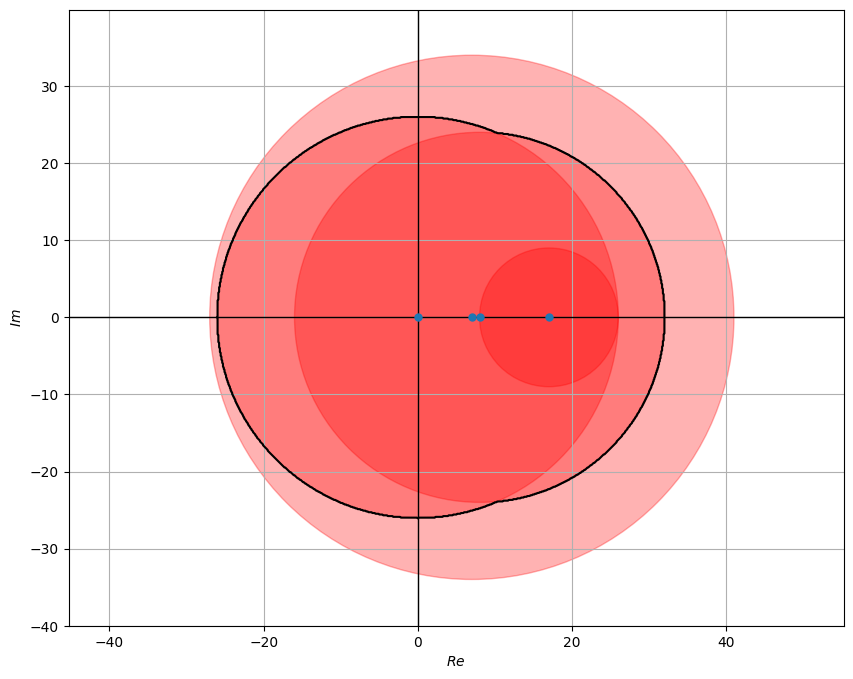

In [92]:

fig, ax = plt.subplots(figsize=(10, 8))
plt.contour(xx, yy, intersection_grid_1, levels=[0.30], colors='black')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
ax.plot(e, np.zeros_like(e), '.', markersize=10)
for i,j in list(zip(e, r)):
    ax.add_patch(plt.Circle((i, 0), j, color='r', alpha=0.3))
ax.grid(True)
plt.ylabel("$Im$")
plt.xlabel("$Re$")
plt.axis('equal')
plt.savefig("Imgs/evs.png")

In [93]:
intersection_grid_2 = []
mask_grid_2 = []

for val in zip(et, np.zeros_like(et), rt):
    intersection_grid_2.append(in_cr(xx, yy, *val))
    mask_grid_2.append(in_cr(xx, yy, *val))
intersection_grid_2 = np.stack(intersection_grid_2).astype(int)
intersection_grid_2 = np.mean(intersection_grid_2, axis=0)
mask_grid_2 = np.any(mask_grid_2, axis=0)

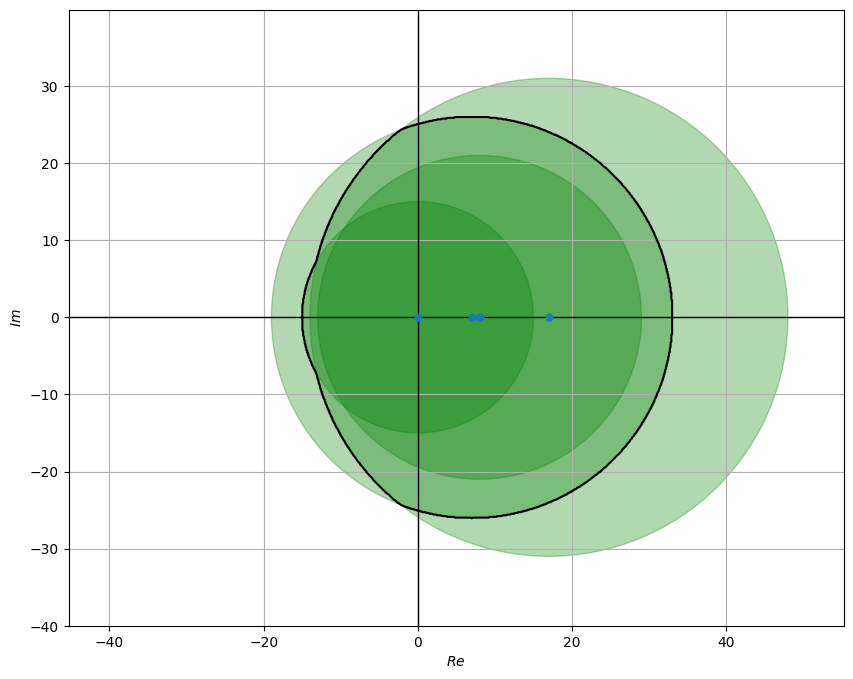

In [94]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.contour(xx, yy, intersection_grid_2, levels=[0.30], colors='black')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
ax.plot(et, np.zeros_like(et), '.', markersize=10)
for i,j in list(zip(et, rt)):
    ax.add_patch(plt.Circle((i, 0), j, color='green', alpha=0.3))
ax.grid(True)
plt.ylabel("$Im$")
plt.xlabel("$Re$")
plt.axis('equal')
plt.savefig("Imgs/evs_t.png")

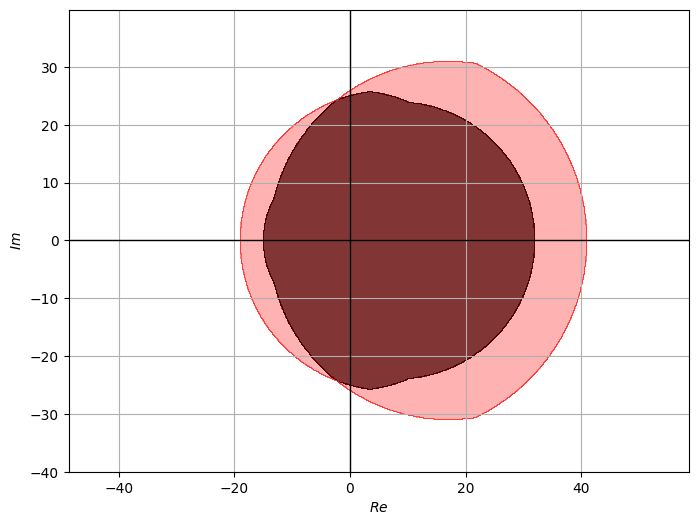

In [95]:
intersection_grid = arr((intersection_grid_1 >= 0.30) & (intersection_grid_2 >= 0.30), dtype=int)
mask_grid = arr((mask_grid_1 & mask_grid_2), dtype=int)

fig, ax = plt.subplots(figsize=(8, 6))

colors1 = ['white', 'black']
cmap1 = mcolors.ListedColormap(colors1)

colors2 = ['white', 'red']
cmap2 = mcolors.ListedColormap(colors2)

contour = plt.contourf(xx, yy, intersection_grid, alpha = 0.7, cmap=cmap1)
contour = plt.contourf(xx, yy, mask_grid, alpha = 0.3, cmap=cmap2)

ax.grid(True)
plt.axis('equal')
plt.ylabel("$Im$")
plt.xlabel("$Re$")
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.savefig("Imgs/bool_and.png")

In [96]:
del A, A_T, ax, cmap1, cmap2, colors1, colors2, e, et, fig, grid_size, i, intersection_grid_1, intersection_grid_2
del x, xx, y, yy, r, rt, val, intersection_grid, mask_grid, mask_grid_1, mask_grid_2, contour, j